In [13]:
import pandas as pd

# 1 Lectura de Dataset

In [17]:
carpeta_origen = "C:/Users/UserPro/Examen_Python_GP/Dataset/"
archivo = "examen_geopython.csv"

In [18]:
dataset_cu = pd.read_csv(carpeta_origen + archivo, sep = ",")

In [19]:
dataset_cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID Sondaje            1080 non-null   int64  
 1   Coordenada Este [X]   1080 non-null   int64  
 2   Coordenada Norte [Y]  1080 non-null   int64  
 3   Elevacion[Z]          1080 non-null   int64  
 4   N de muestra          1080 non-null   int64  
 5   Variable [Cu en %]    1080 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 50.8 KB


In [20]:
dataset_cu.tail()

,ID Sondaje,Coordenada Este [X],Coordenada Norte [Y],Elevacion[Z],N de muestra,Variable [Cu en %]
1075,90,650,600,110,1076,0.467052
1076,90,650,600,115,1077,0.843642
1077,90,650,600,120,1078,1.410650
1078,90,650,600,125,1079,0.971413
1079,90,650,600,130,1080,0.933122


# 2 Visualización de Datos

In [21]:
import numpy as np

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df1 = pd.read_csv(carpeta_origen + archivo, sep = ",")
xdrill = df1["Coordenada Este [X]"]
ydrill = df1["Coordenada Norte [Y]"]
zdrill = df1["Elevacion[Z]"]
cudrill = df1["Variable [Cu en %]"]

In [24]:
from mpl_toolkits.mplot3d import Axes3D

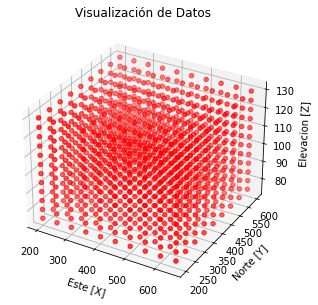

In [25]:
fig3d = plt.figure(figsize=(5,5))
plot3d = fig3d.add_subplot(111, projection ='3d')
plot3d.scatter(xdrill, ydrill, zdrill, c='r', marker='o')

plot3d.set_xlabel("Este [X]")
plot3d.set_ylabel("Norte [Y]")
plot3d.set_zlabel("Elevacion [Z]")
plot3d.set_title("Visualización de Datos")

plt.show()

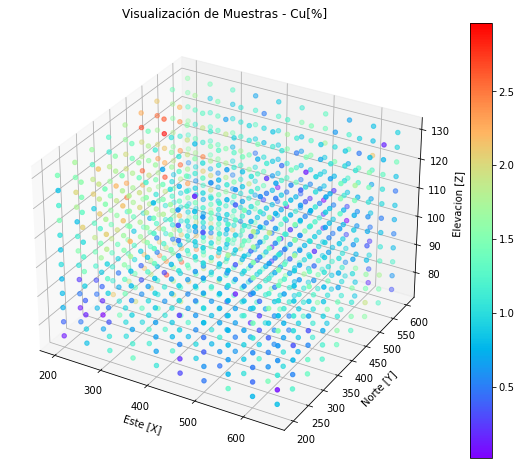

In [26]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
xs,ys,zs = xdrill, ydrill, zdrill
p = ax.scatter3D(xs,ys,zs=zs, c=cudrill, cmap='rainbow')

ax.set_xlabel("Este [X]")
ax.set_ylabel("Norte [Y]")
ax.set_zlabel("Elevacion [Z]")
ax.set_title("Visualización de Muestras - Cu[%]")

fig.colorbar(p, ax=ax)

plt.show()

# 3 Estadística Descriptiva

In [27]:
df1.head()

,ID Sondaje,Coordenada Este [X],Coordenada Norte [Y],Elevacion[Z],N de muestra,Variable [Cu en %]
0,1,200,200,75,1,0.113597
1,1,200,200,80,2,0.402376
2,1,200,200,85,3,0.738256
3,1,200,200,90,4,0.788436
4,1,200,200,95,5,0.774902


In [28]:
columna_cu = ["Variable [Cu en %]"]
df2 = df1[columna_cu]
df2.head()

,Variable [Cu en %]
0,0.113597
1,0.402376
2,0.738256
3,0.788436
4,0.774902


In [29]:
df2.mean() #media

Variable [Cu en %]    1.111156
dtype: float64

In [30]:
df2.median() #mediana

Variable [Cu en %]    1.06118
dtype: float64

In [31]:
df2.mode() #moda

,Variable [Cu en %]
0,0.799841
1,1.299070


In [32]:
df2.var() #varianza

Variable [Cu en %]    0.237724
dtype: float64

In [33]:
s = np.sqrt(df2.var()) #desviacion estándar
s

Variable [Cu en %]    0.487569
dtype: float64

In [34]:
cv = s/df2.mean() #coeficiente de varición
cv

Variable [Cu en %]    0.438795
dtype: float64

In [35]:
df2.skew() #asimetría

Variable [Cu en %]    0.532818
dtype: float64

In [36]:
df2.kurt() #kurtosis

Variable [Cu en %]    0.257639
dtype: float64

# 4 Análisis de Deriva

In [37]:
df1.describe()

,ID Sondaje,Coordenada Este [X],Coordenada Norte [Y],Elevacion[Z],N de muestra,Variable [Cu en %]
count,1080.000000,1080.0000,1080.000000,1080.000000,1080.00000,1080.000000
mean,45.500000,425.0000,400.000000,102.500000,540.50000,1.111156
std,25.991194,143.6806,129.159255,17.268259,311.91345,0.487569
min,1.000000,200.0000,200.000000,75.000000,1.00000,0.016985
25%,23.000000,300.0000,300.000000,88.750000,270.75000,0.760585
50%,45.500000,425.0000,400.000000,102.500000,540.50000,1.061180
75%,68.000000,550.0000,500.000000,116.250000,810.25000,1.411830
max,90.000000,650.0000,600.000000,130.000000,1080.00000,2.963290


In [38]:
#Matriz Este
df1_new_x = pd.DataFrame({'From':list(range(200,601,50)), 'To':list(range(250,651,50)), 'cu':np.nan})
df1_new_x.head()

,From,To,cu
0,200,250,NaN
1,250,300,NaN
2,300,350,NaN
3,350,400,NaN
4,400,450,NaN


In [39]:
a = (df1[(df1['Coordenada Este [X]']>=200) & (df1['Coordenada Este [X]']<250)]).mean()
ax = a['Variable [Cu en %]']
b = (df1[(df1['Coordenada Este [X]']>=250) & (df1['Coordenada Este [X]']<300)]).mean()
bx = b['Variable [Cu en %]']
c = (df1[(df1['Coordenada Este [X]']>=300) & (df1['Coordenada Este [X]']<350)]).mean()
cx = c['Variable [Cu en %]']
d = (df1[(df1['Coordenada Este [X]']>=350) & (df1['Coordenada Este [X]']<400)]).mean()
dx = d['Variable [Cu en %]']
e = (df1[(df1['Coordenada Este [X]']>=400) & (df1['Coordenada Este [X]']<450)]).mean()
ex = e['Variable [Cu en %]']
f = (df1[(df1['Coordenada Este [X]']>=450) & (df1['Coordenada Este [X]']<500)]).mean()
fx = f['Variable [Cu en %]']
g = (df1[(df1['Coordenada Este [X]']>=500) & (df1['Coordenada Este [X]']<550)]).mean()
gx = g['Variable [Cu en %]']
h = (df1[(df1['Coordenada Este [X]']>=550) & (df1['Coordenada Este [X]']<600)]).mean()
hx = h['Variable [Cu en %]']
i = (df1[(df1['Coordenada Este [X]']>=600) & (df1['Coordenada Este [X]']<650)]).mean()
ix = i['Variable [Cu en %]']

df1_new_x['cu'] = [ax,bx,cx,dx,ex,fx,gx,hx,ix]

df1_new_x['promxy'] = df1_new_x['To']-25

df1_new_x.head(9)

,From,To,cu,promxy
0,200,250,1.472840,225
1,250,300,1.501402,275
2,300,350,1.332283,325
3,350,400,1.237766,375
4,400,450,1.094834,425
5,450,500,0.864688,475
6,500,550,0.804459,525
7,550,600,0.849613,575
8,600,650,0.936310,625


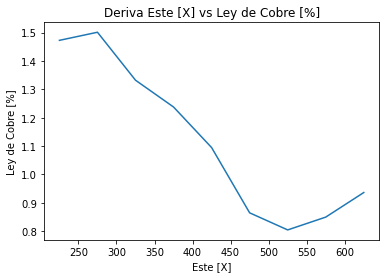

In [40]:
plt.plot(df1_new_x['promxy'],df1_new_x['cu'])

plt.xlabel('Este [X]')
plt.ylabel('Ley de Cobre [%]')
plt.title('Deriva Este [X] vs Ley de Cobre [%]')

plt.show()

In [41]:
#Matriz Norte
df1_new_y = pd.DataFrame({'From':list(range(200,551,50)), 'To':list(range(250,601,50)), 'cu':np.nan})
df1_new_y.head(8)

,From,To,cu
0,200,250,NaN
1,250,300,NaN
2,300,350,NaN
3,350,400,NaN
4,400,450,NaN
5,450,500,NaN
6,500,550,NaN
7,550,600,NaN


In [42]:
a2 = (df1[(df1['Coordenada Norte [Y]']>=200) & (df1['Coordenada Norte [Y]']<250)]).mean()
ay = a2['Variable [Cu en %]']
b2 = (df1[(df1['Coordenada Norte [Y]']>=250) & (df1['Coordenada Norte [Y]']<300)]).mean()
by = b2['Variable [Cu en %]']
c2 = (df1[(df1['Coordenada Norte [Y]']>=300) & (df1['Coordenada Norte [Y]']<350)]).mean()
cy = c2['Variable [Cu en %]']
d2 = (df1[(df1['Coordenada Norte [Y]']>=350) & (df1['Coordenada Norte [Y]']<400)]).mean()
dy = d2['Variable [Cu en %]']
e2 = (df1[(df1['Coordenada Norte [Y]']>=400) & (df1['Coordenada Norte [Y]']<450)]).mean()
ey = e2['Variable [Cu en %]']
f2 = (df1[(df1['Coordenada Norte [Y]']>=450) & (df1['Coordenada Norte [Y]']<500)]).mean()
fy = f2['Variable [Cu en %]']
g2 = (df1[(df1['Coordenada Norte [Y]']>=500) & (df1['Coordenada Norte [Y]']<550)]).mean()
gy = g2['Variable [Cu en %]']
h2 = (df1[(df1['Coordenada Norte [Y]']>=550) & (df1['Coordenada Norte [Y]']<600)]).mean()
hy = h2['Variable [Cu en %]']

df1_new_y['cu'] = [ay,by,cy,dy,ey,fy,gy,hy]

df1_new_y['promxy'] = df1_new_y['To']-25

df1_new_y.head(9)

,From,To,cu,promxy
0,200,250,0.976813,225
1,250,300,1.079705,275
2,300,350,1.035518,325
3,350,400,1.022757,375
4,400,450,1.184750,425
5,450,500,1.324360,475
6,500,550,1.265382,525
7,550,600,1.132272,575


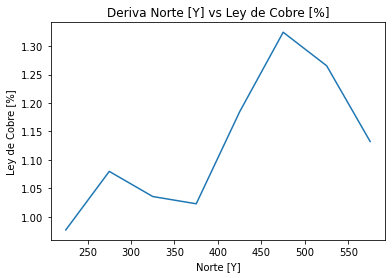

In [43]:
plt.plot(df1_new_y['promxy'],df1_new_y['cu'])

plt.xlabel('Norte [Y]')
plt.ylabel('Ley de Cobre [%]')
plt.title('Deriva Norte [Y] vs Ley de Cobre [%]')

plt.show()

# 5 Gráficos Estadísticos

In [44]:
df2.describe()

,Variable [Cu en %]
count,1080.000000
mean,1.111156
std,0.487569
min,0.016985
25%,0.760585
50%,1.061180
75%,1.411830
max,2.963290


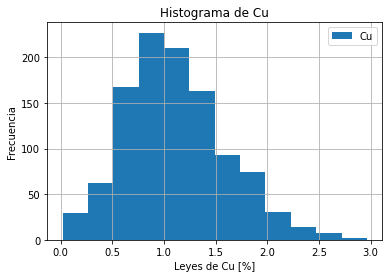

In [45]:
plt.hist(df1['Variable [Cu en %]'], bins='sturges', label='Cu')

plt.xlabel('Leyes de Cu [%]')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cu')
plt.legend()
plt.grid(True)
plt.show()

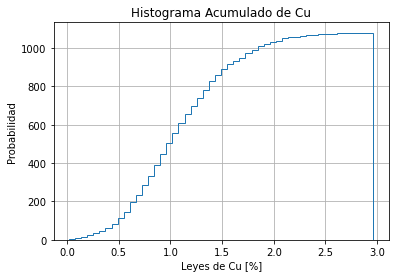

In [34]:
plt.hist(df1['Variable [Cu en %]'], bins=50, histtype='step', cumulative=True)

plt.xlabel('Leyes de Cu [%]')
plt.ylabel('Probabilidad')
plt.title('Histograma Acumulado de Cu')
plt.grid(True)
plt.show()

In [1]:
diamantes = dict(markerfacecolor='g', marker='D')

plt.boxplot(df1['Variable [Cu en %]'], vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("Ley de Cobre [%]")
plt.title("Diagrama de Cajas y Bigotes")

plt.show()

NameError: name 'plt' is not defined

# 6 Variograma

In [36]:
import pykrige
import pykrige.kriging_tools as kt
from pykrige.ok3d import OrdinaryKriging3D

In [37]:
x = np.array(df1['Coordenada Este [X]'])

In [38]:
y = np.array(df1['Coordenada Norte [Y]'])
z = np.array(df1['Elevacion[Z]'])
val = np.array(df1['Variable [Cu en %]'])

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'gaussian' Variogram Model
Partial Sill: 0.165
Full Sill: 0.31
Range: 425
Nugget: 0.145 



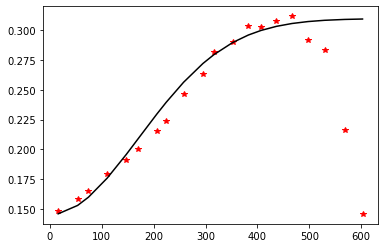

Calculating statistics on variogram model fit...
Q1 = 0.008722104156175279
Q2 = 0.9981496685969299
cR = 0.15233209600422298 



In [51]:
ok3d = OrdinaryKriging3D(x,y,z,val,variogram_model='gaussian', nlags=20, variogram_parameters={'sill':0.31,'range':425, 'nugget':0.145}, verbose=True, enable_plotting=True)

# 7 Creación de Grilla

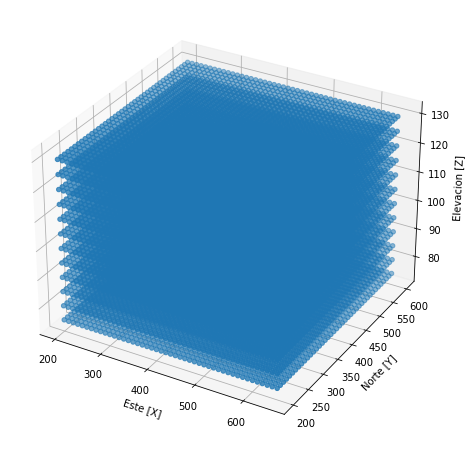

In [78]:
gridx = np.linspace(200,660, num=46, endpoint=False) #tamaño de celda x 10
gridy = np.linspace(200,610, num=41, endpoint=False) #tamaño de celda y 10
gridz = np.linspace(75,135, num=12, endpoint=False) #tamaño de celda z 5

zg,yg,xg = np.meshgrid(gridz,gridy,gridx, indexing='ij')

fig3d = plt.figure(figsize=(10,8))
plot3d = fig3d.add_subplot(111, projection='3d')
plot3d.scatter(xg,yg,zg)

plot3d.set_xlabel("Este [X]")
plot3d.set_ylabel("Norte [Y]")
plot3d.set_zlabel("Elevacion [Z]")
plt.show()

# 8 Estimación por OK

In [64]:
k3d, ss3d = ok3d.execute('grid', gridx, gridy, gridz)

Executing Ordinary Kriging...



In [66]:
k3d.shape

(12, 41, 46)

In [67]:
ss3d.shape

(12, 41, 46)

# 9 Visualización de la Estimación

In [71]:
k = k3d.ravel()
v = ss3d.ravel()
z_g = zg.ravel()
y_g = yg.ravel()
x_g = xg.ravel()

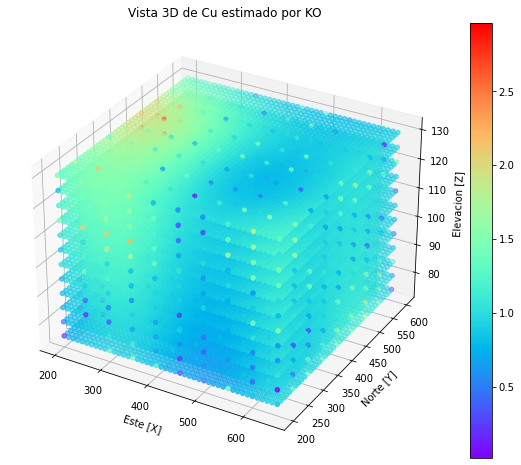

In [80]:
fig1 = plt.figure(figsize=(10,8))

ax = fig1.add_subplot(111, projection='3d')

xs,ys,zs = x_g, y_g, z_g
cuok = k

p = ax.scatter3D(xs, ys, zs=zs, c=cuok, cmap='rainbow')
ax.set_xlabel("Este [X]")
ax.set_ylabel("Norte [Y]")
ax.set_zlabel("Elevacion [Z]")
ax.set_title("Vista 3D de Cu estimado por KO")

fig1.colorbar(p,ax=ax)

plt.show()

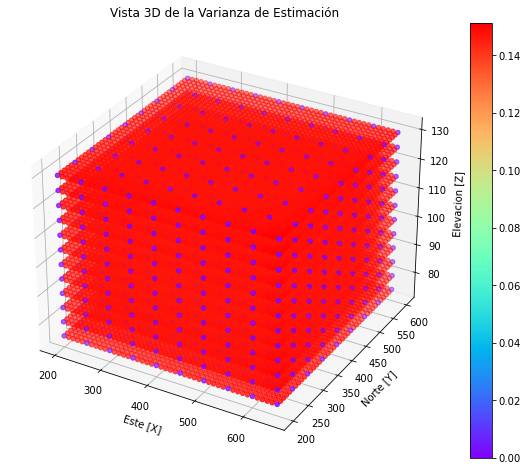

In [81]:
fig2 = plt.figure(figsize=(10,8))

ax = fig2.add_subplot(111, projection='3d')

xs,ys,zs = x_g, y_g, z_g
cuvar = v

p = ax.scatter3D(xs, ys, zs=zs, c=cuvar, cmap='rainbow')
ax.set_xlabel("Este [X]")
ax.set_ylabel("Norte [Y]")
ax.set_zlabel("Elevacion [Z]")
ax.set_title("Vista 3D de la Varianza de Estimación")

fig2.colorbar(p,ax=ax)

plt.show()

In [85]:
d = {'Este[X]': x_g, 'Norte[Y]': y_g, 'Elevacion[Z]': z_g, 'Cobre_KO': k, 'Varianza': v}

df3 = pd.DataFrame(data=d)

df3.head(42)

,Este[X],Norte[Y],Elevacion[Z],Cobre_KO,Varianza
0,200.0,200.0,75.0,0.113597,1.904696e-15
1,210.0,200.0,75.0,0.723723,1.512652e-01
2,220.0,200.0,75.0,0.751818,1.506348e-01
3,230.0,200.0,75.0,0.778680,1.501791e-01
4,240.0,200.0,75.0,0.803781,1.498580e-01
5,250.0,200.0,75.0,0.816232,-1.574900e-15
6,260.0,200.0,75.0,0.846759,1.494875e-01
7,270.0,200.0,75.0,0.863796,1.493866e-01
8,280.0,200.0,75.0,0.877416,1.493173e-01
9,290.0,200.0,75.0,0.887379,1.492672e-01
